ML ASSIGNMENT 8 - k means clustering

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("/Users/navi/Downloads/Social_Network_Ads (1).csv", engine='python', encoding='utf-8')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

<AxesSubplot:>

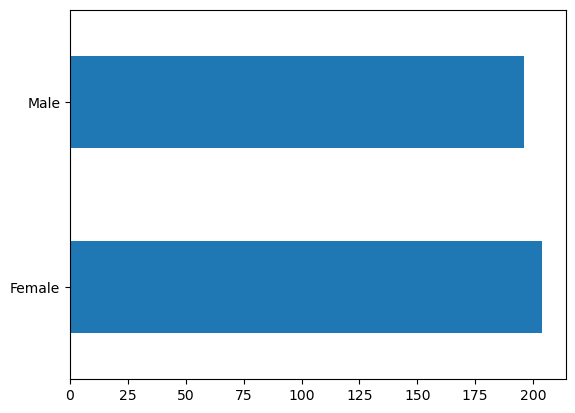

In [7]:
df['Gender'].value_counts().plot(kind='barh')

In [8]:
x_feat = df.iloc[:,:-1]
x_feat

,User ID,Gender,Age,EstimatedSalary
0,15624510,Male,19,19000
1,15810944,Male,35,20000
2,15668575,Female,26,43000
3,15603246,Female,27,57000
4,15804002,Male,19,76000
...,...,...,...,...
395,15691863,Female,46,41000
396,15706071,Male,51,23000
397,15654296,Female,50,20000
398,15755018,Male,36,33000


In [9]:
x_feat.drop('User ID', axis=1, inplace=True)

In [10]:
print('Shape of x_feat =',x_feat.shape)

Shape of x_feat = (400, 3)


In [11]:
#Encoding Categorical data i.e. Gender
le = LabelEncoder()
x_feat['Gender']=le.fit_transform(x_feat.iloc[:,0])

In [12]:
x_feat

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


<AxesSubplot:>

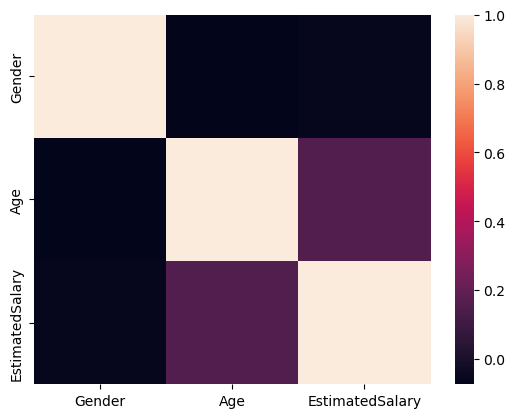

In [13]:
sns.heatmap(x_feat.corr())

In [14]:
kmeans = KMeans(n_clusters=2)

In [15]:
x_feat["Cluster"] = kmeans.fit_predict(x_feat)

In [16]:
x_feat

,Gender,Age,EstimatedSalary,Cluster
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,0
396,1,51,23000,0
397,0,50,20000,0
398,1,36,33000,0


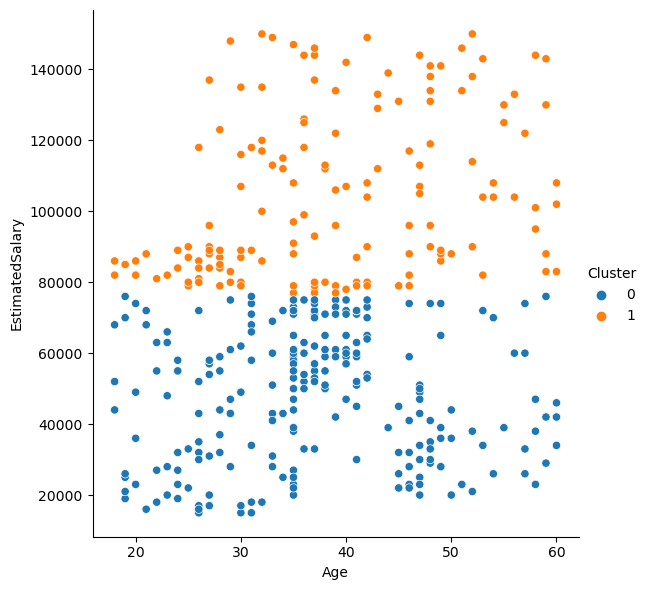

In [17]:
sns.relplot(
    x="Age", y="EstimatedSalary", hue="Cluster", data=x_feat, height=6,
);

In [18]:
kmeans.cluster_centers_

array([[5.08130081e-01, 3.70325203e+01, 4.81219512e+04],
       [4.61038961e-01, 3.86493506e+01, 1.04279221e+05]])

In [19]:
kmeans.inertia_

165197378668.46286

Checking best value of k with Elbow Method

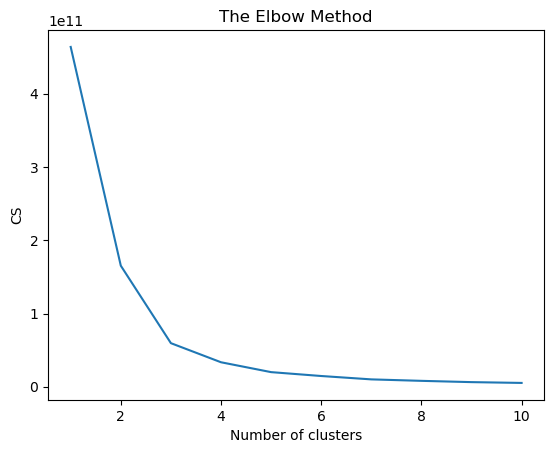

In [20]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x_feat)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [21]:
kmeans = KMeans(n_clusters=3)

In [22]:
kmeans.fit_predict(x_feat)

array([2, 2, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2,
       0, 2, 0, 2, 1, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 1, 2, 0, 0, 1, 0, 0,
       2, 0, 0, 0, 0, 2, 2, 1, 2, 1, 2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 2, 0,
       0, 2, 0, 1, 2, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2,
       2, 2, 0, 0, 2, 1, 0, 0, 2, 2, 0, 0, 2, 0, 1, 2, 0, 1, 1, 2, 0, 2,
       2, 2, 2, 2, 2, 0, 1, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2,
       0, 2, 2, 0, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1, 2, 0, 2, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 2, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 2, 1, 2, 0, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 1, 0,
       0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 2,

In [23]:
kmeans.inertia_

59521270406.62228